[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stammler/pca_wahlanalyse/HEAD?labpath=notebooks%2Fbeispiel_pca.ipynb)

# Template

Dies ist ein Notebook, welches die [Hauptkomponentenanalyse](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse) auf einen beliebigen Datensatz andwendet und unkommentiert die plots erstellt. Die Thesen und die Positionen wurden von der [Bundeszentrale für politische Bildung](https://www.bpb.de/) im Rahmen des [Wahl-O-Mats](https://www.bpb.de/themen/wahl-o-mat/) erstellt und veröffentlicht.

In [1]:
from IPython.display import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
from pca_wahl import utils
from sklearn.decomposition import PCA

In [2]:
plt.rcParams["figure.dpi"] = 200.

## Laden der Daten

In [3]:
utils.show_available_elections()

2024-06-09_eu: Europawahl 2024                                  (file found)
2014-05-25_eu: Europawahl 2014                                  (file found)
2009-06-07_eu: Europawahl 2009                                  (file found)
2004-06-13_eu: Europawahl 2009                                  (file found)
2025-02-23_de: Bundestagswahl 2025                              (file found)
2021-09-26_de: Bundestagswahl 2021                              (file found)
2017-09-24_de: Bundestagswahl 2017                              (file found)
2013-09-22_de: Bundestagswahl 2013                              (file found)
2009-09-27_de: Bundestagswahl 2009                              (file found)
2005-09-18_de: Bundestagswahl 2005                              (file found)
2026-03-08_bw: Landtagswahl in Baden-Württemberg 2026           (file NOT found)
2021-03-14_bw: Landtagswahl in Baden-Württemberg 2021           (file found)
2016-03-13_bw: Landtagswahl in Baden-Württemberg 2016           (file fo

In [4]:
data = utils.load_election_data("2025-02-23_de")

## Nutzungsbedingungen

In [5]:
print(data.note)

##### Hinweis zur Verwendung des Wahl-O-Mat-Datensatzes #####

Die Bundeszentrale für politische Bildung ist Urheber des nachfolgend veröffentlichten Wahl-O-Mat-Datensatzes. 
Die Veröffentlichung des Datensatzes dient lediglich dem Zugang zu den in ihm enthaltenen Informationen. 
Jede Nutzung des Datensatzes, egal welcher Art, wird untersagt. Die Schranken des Urheberrechts durch gesetzlich 
erlaubte Nutzung bleiben hiervon unberührt.

Eine Ausnahme gilt nur für die Analyse des Datensatzes zu wissenschaftlichen oder journalistischen Zwecken sowie 
für die Veröffentlichung der Ergebnisse dieser Analyse. 
Dabei muss jederzeit klar erkennbar sein, dass die Bundeszentrale für politische Bildung nicht Urheber dieser 
Analyse ist.

Explizit untersagt ist in diesem Rahmen die Nutzung des Datensatzes für die Erstellung von Angeboten, in deren 
Rahmen  ähnlich dem Wahl-O-Mat  Nutzerinnen und Nutzer sich auf Basis der eigenen Positionen ihre Nähe zu den 
Parteien anzeigen oder errechnen lass

## Disclaimer

An dieser Stelle sei erähnt, dass diese Analyse zu **wissenschaftlichen und journalistischen Zwecken** erstellt und veröffentlicht wurde. Es besteht **keine Verbindung zur Bundeszentrale für politische Bildung**.

## Bereinigung

In [6]:
remove = ["Verjüngungsforschung"]

In [7]:
data = utils.remove_party_from_data(data, remove=remove)

Folgende Parteien verbleiben im Datensatz:

In [8]:
data.parties

array(['SPD', 'CDU / CSU', 'GRÜNE', 'FDP', 'AfD', 'Die Linke', 'SSW',
       'FREIE WÄHLER', 'Tierschutzpartei', 'dieBasis', 'Die PARTEI',
       'Die Gerechtigkeitspartei - Team Todenhöfer', 'PIRATEN', 'Volt',
       'ÖDP', 'PdH', 'Bündnis C', 'BP', 'MLPD', 'MENSCHLICHE WELT', 'PdF',
       'SGP', 'BüSo', 'BÜNDNIS DEUTSCHLAND', 'BSW', 'MERA25',
       'WerteUnion'], dtype='<U42')

### Hilfsvariablen

In [9]:
N_par, N_the = data.X.shape

In [10]:
N_komp = np.minimum(N_par, N_the)

In [11]:
N_max = 10
parties_short = []
for party in data.parties:
    if len(party) > N_max:
        parties_short.append(party[:N_max]+"...")
    else:
        parties_short.append(party)

## Die Thesen

In [12]:
md = []
for i in range(data.statements.shape[0]):
    md.append("* **These {:d}: {}** <br/> {}".format(i+1, data.statements[i], data.statements_long[i]))
display(Markdown("\n".join(md)))

* **These 1: Unterstützung der Ukraine** <br/> Deutschland soll die Ukraine weiterhin militärisch unterstützen.
* **These 2: Erneuerbare Energien** <br/> Der Ausbau erneuerbarer Energien soll weiterhin vom Staat finanziell gefördert werden.
* **These 3: Streichung des Bürgergelds** <br/> Das Bürgergeld soll denjenigen gestrichen werden, die wiederholt Stellenangebote ablehnen.
* **These 4: Tempolimit auf Autobahnen** <br/> Auf allen Autobahnen soll ein generelles Tempolimit gelten.
* **These 5: Abweisung Asylsuchender** <br/> Asylsuchende, die über einen anderen EU-Staat eingereist sind, sollen an den deutschen Grenzen abgewiesen werden.
* **These 6: Begrenzung der Mietpreise** <br/> Bei Neuvermietungen sollen die Mietpreise weiterhin gesetzlich begrenzt werden.
* **These 7: Automatisierte Gesichtserkennung** <br/> An Bahnhöfen soll die Bundespolizei Software zur automatisierten Gesichtserkennung einsetzen dürfen.
* **These 8: Energieintensive Unternehmen** <br/> Energieintensive Unternehmen sollen vom Staat einen finanziellen Ausgleich für ihre Stromkosten erhalten.
* **These 9: Rente nach 40 Beitragsjahren** <br/> Alle Beschäftigten sollen bereits nach 40 Beitragsjahren ohne Abschläge in Rente gehen können.
* **These 10: Grundgesetz** <br/> Im einleitenden Satz des Grundgesetzes soll weiterhin die Formulierung „Verantwortung vor Gott“ stehen.
* **These 11: Anwerbung von Fachkräften** <br/> Deutschland soll weiterhin die Anwerbung von Fachkräften aus dem Ausland fördern.
* **These 12: Nutzung der Kernenergie** <br/> Für die Stromerzeugung soll Deutschland wieder Kernenergie nutzen.
* **These 13: Anhebung des Spitzensteuersatzes** <br/> Bei der Besteuerung von Einkommen soll der Spitzensteuersatz angehoben werden.
* **These 14: Kompetenzen in der Schulpolitik** <br/> Der Bund soll mehr Kompetenzen in der Schulpolitik erhalten.
* **These 15: Rüstungsexporte nach Israel** <br/> Aus Deutschland sollen weiterhin Rüstungsgüter nach Israel exportiert werden dürfen.
* **These 16: Krankenkassen** <br/> Alle Bürgerinnen und Bürger sollen in gesetzlichen Krankenkassen versichert sein müssen.
* **These 17: Abschaffung der Frauenquote** <br/> Die gesetzliche Frauenquote in Vorständen und Aufsichtsräten börsennotierter Unternehmen soll abgeschafft werden.
* **These 18: Ökologische Landwirtschaft** <br/> Ökologische Landwirtschaft soll stärker gefördert werden als konventionelle Landwirtschaft.
* **These 19: Projekte gegen Rechtsextremismus** <br/> Der Bund soll Projekte gegen Rechtsextremismus verstärkt fördern.
* **These 20: Kontrolle von Zulieferern** <br/> Unternehmen sollen weiterhin die Einhaltung der Menschenrechte und des Umweltschutzes bei allen Zulieferern kontrollieren müssen.
* **These 21: Elternabhängiges BAföG** <br/> Die Ausbildungsförderung BAföG soll weiterhin abhängig vom Einkommen der Eltern gezahlt werden.
* **These 22: Schuldenbremse** <br/> Die Schuldenbremse im Grundgesetz soll beibehalten werden.
* **These 23: Arbeitserlaubnis für Asylsuchende** <br/> Asylsuchende sollen in Deutschland sofort nach ihrer Antragstellung eine Arbeitserlaubnis erhalten.
* **These 24: Verwerfen der Klimaziele** <br/> Deutschland soll das Ziel verwerfen, klimaneutral zu werden.
* **These 25: 35-Stunden-Woche** <br/> In Deutschland soll die 35-Stunden-Woche als gesetzliche Regelarbeitszeit für alle Beschäftigten festgelegt werden.
* **These 26: Schwangerschaftsabbruch nach Beratung** <br/> Schwangerschaftsabbrüche sollen in den ersten drei Monaten weiterhin nur nach Beratung straffrei sein.
* **These 27: Nationale Währung** <br/> Der Euro soll in Deutschland durch eine nationale Währung ersetzt werden.
* **These 28: Schiene vor Straße** <br/> Beim Ausbau der Verkehrsinfrastruktur soll die Schiene Vorrang vor der Straße haben.
* **These 29: Ehrenamt** <br/> Ehrenamtliche Tätigkeiten sollen auf die zukünftige Rente angerechnet werden.
* **These 30: Umlegung der Grundsteuer** <br/> Die Grundsteuer soll weiterhin auf Mieterinnen und Mieter umgelegt werden dürfen.
* **These 31: Einschränkung des Streikrechts** <br/> Das Streikrecht für Beschäftigte in Unternehmen der kritischen Infrastruktur soll gesetzlich eingeschränkt werden.
* **These 32: Volksentscheide** <br/> In Deutschland soll es auf Bundesebene Volksentscheide geben können.
* **These 33: Strafrecht für unter 14-Jährige** <br/> Unter 14-Jährige sollen strafrechtlich belangt werden können.
* **These 34: Abschaffung von Zöllen** <br/> Deutschland soll sich für die Abschaffung der erhöhten EU-Zölle auf chinesische Elektroautos einsetzen.
* **These 35: Zweite Staatsbürgerschaft** <br/> In Deutschland soll es weiterhin generell möglich sein, neben der deutschen eine zweite Staatsbürgerschaft zu haben.
* **These 36: Soziales Pflichtjahr** <br/> Für junge Erwachsene soll ein soziales Pflichtjahr eingeführt werden.
* **These 37: Fossile Brennstoffe** <br/> Neue Heizungen sollen auch zukünftig vollständig mit fossilen Brennstoffen (z. B. Gas oder Öl) betrieben werden dürfen.
* **These 38: Erhöhung des Mindestlohns** <br/> Der gesetzliche Mindestlohn soll spätestens 2026 auf 15 Euro erhöht werden.

## Korrelationsmatrix

In [13]:
P = np.corrcoef(data.X.T)

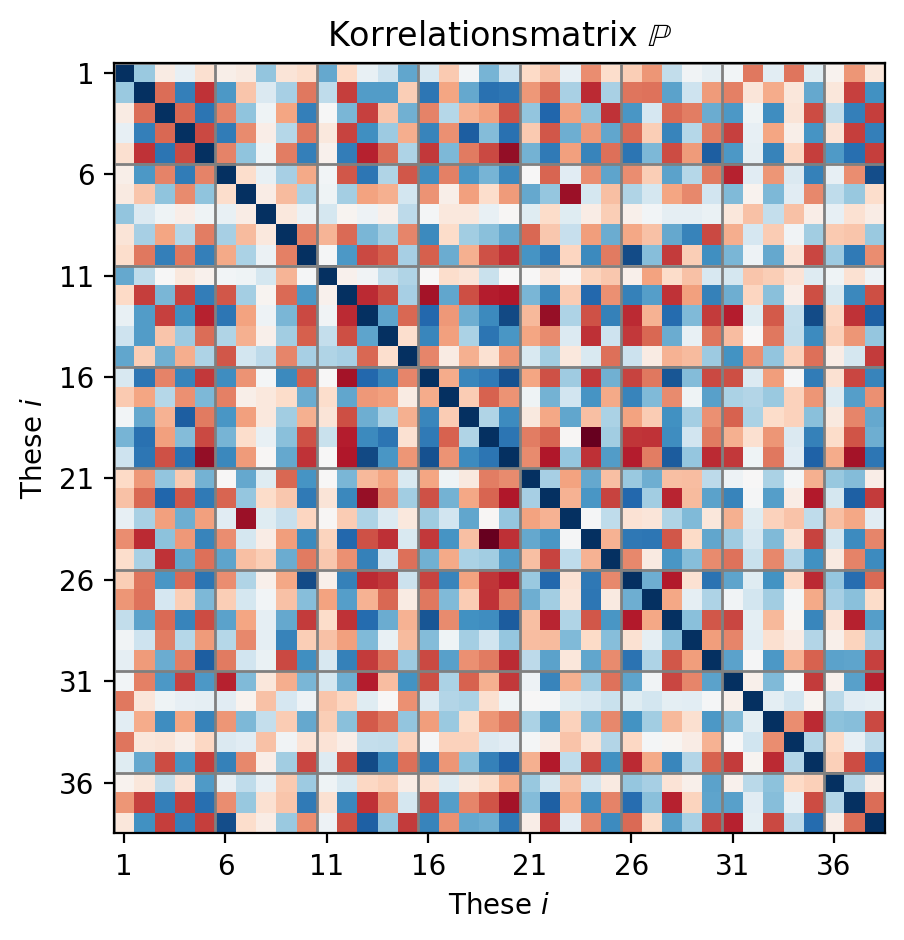

In [14]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ticks = np.arange(0, N_the+1, 5)
ax.imshow(P, vmin=-1, vmax=1, cmap="RdBu")
ax.set(
    aspect=1., title=r"Korrelationsmatrix $\mathbb{P}$",
    xticks=ticks, yticks=ticks, xticklabels=ticks+1, yticklabels=ticks+1,
    xlabel=r"These $i$", ylabel=r"These $i$",
)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
fig.set_layout_engine("tight")

## Kovarianzmatrix

In [15]:
covX = np.cov(data.X.T)

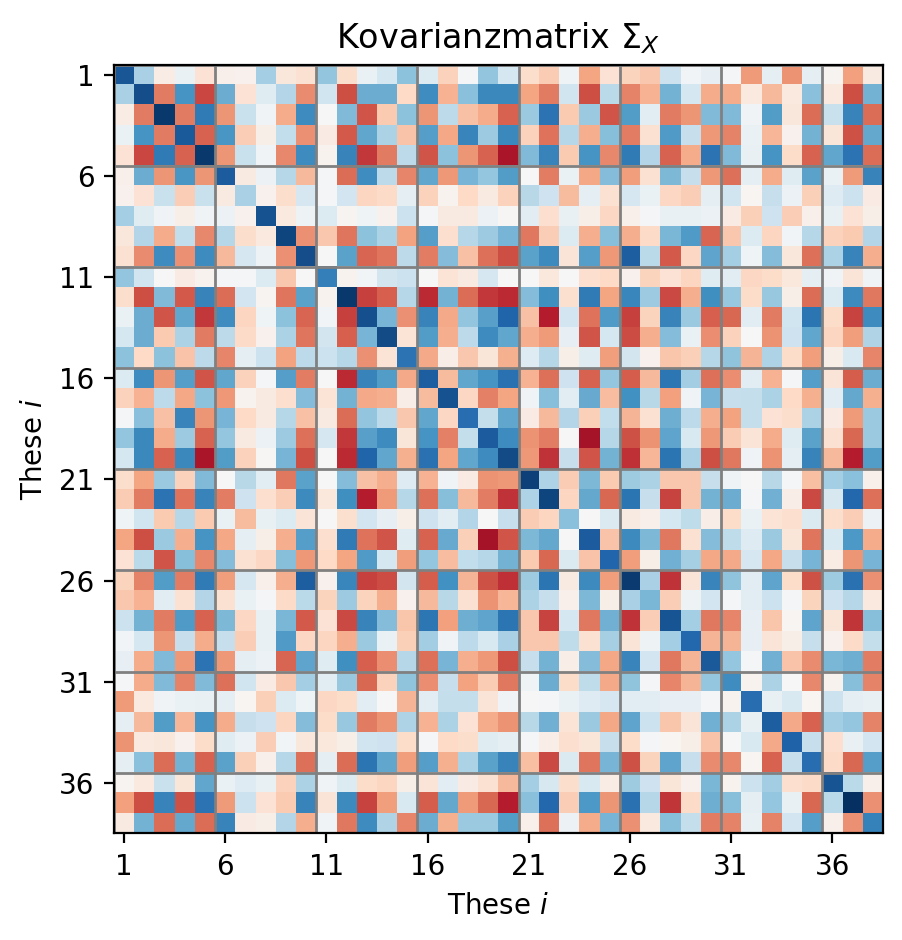

In [16]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ticks = np.arange(0, N_the+1, 5)
lim = np.abs(covX).max()
ax.imshow(covX, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set(
    aspect=1., title=r"Kovarianzmatrix $\Sigma_X$",
    xticks=ticks, yticks=ticks, xticklabels=ticks+1, yticklabels=ticks+1,
    xlabel=r"These $i$", ylabel=r"These $i$",
)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
fig.set_layout_engine("tight")

## Hauptkomponentenanalyse

In [17]:
pca = PCA()
Y = pca.fit_transform(data.X)

In [18]:
covY = np.cov(Y.T)

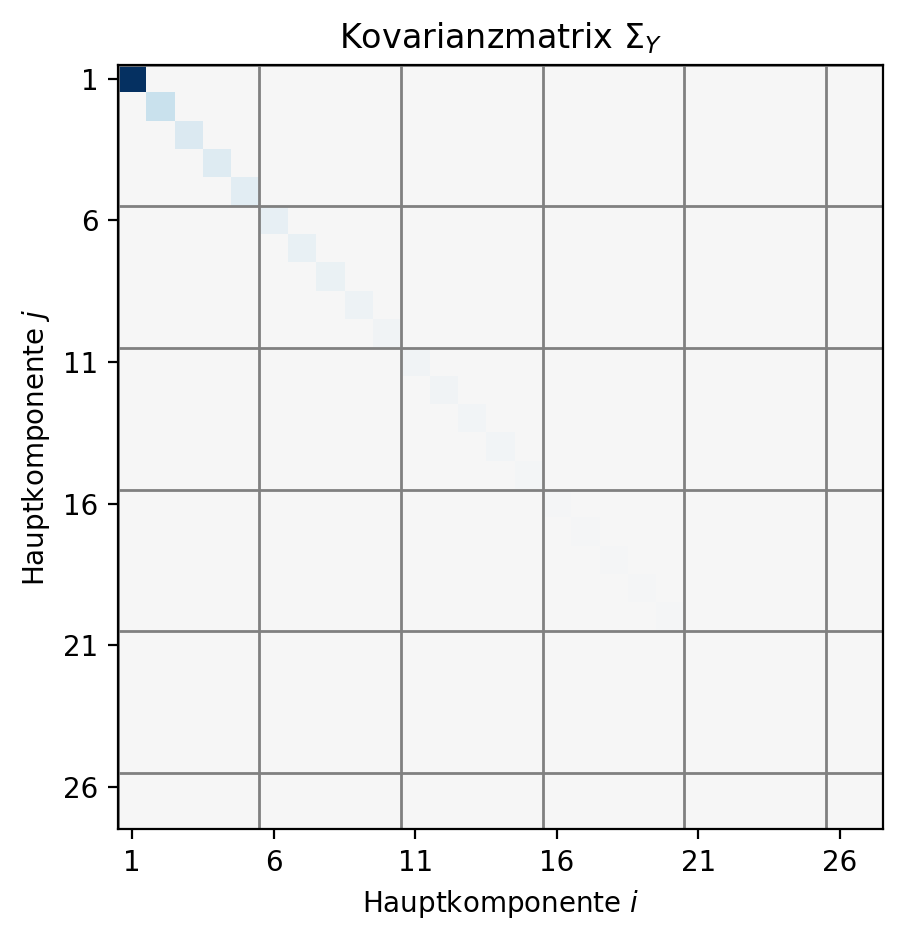

In [19]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ticks = np.arange(0, N_komp+1, 5)
lim = np.abs(covY).max()
ax.imshow(covY, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set(
    aspect=1., title=r"Kovarianzmatrix $\Sigma_Y$",
    xticks=ticks, yticks=ticks, xticklabels=ticks+1, yticklabels=ticks+1,
    xlabel=r"Hauptkomponente $i$", ylabel=r"Hauptkomponente $j$",
)
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
fig.set_layout_engine("tight")

### Varianzbeiträge

In [20]:
expl_var_ratio = pca.explained_variance_ratio_

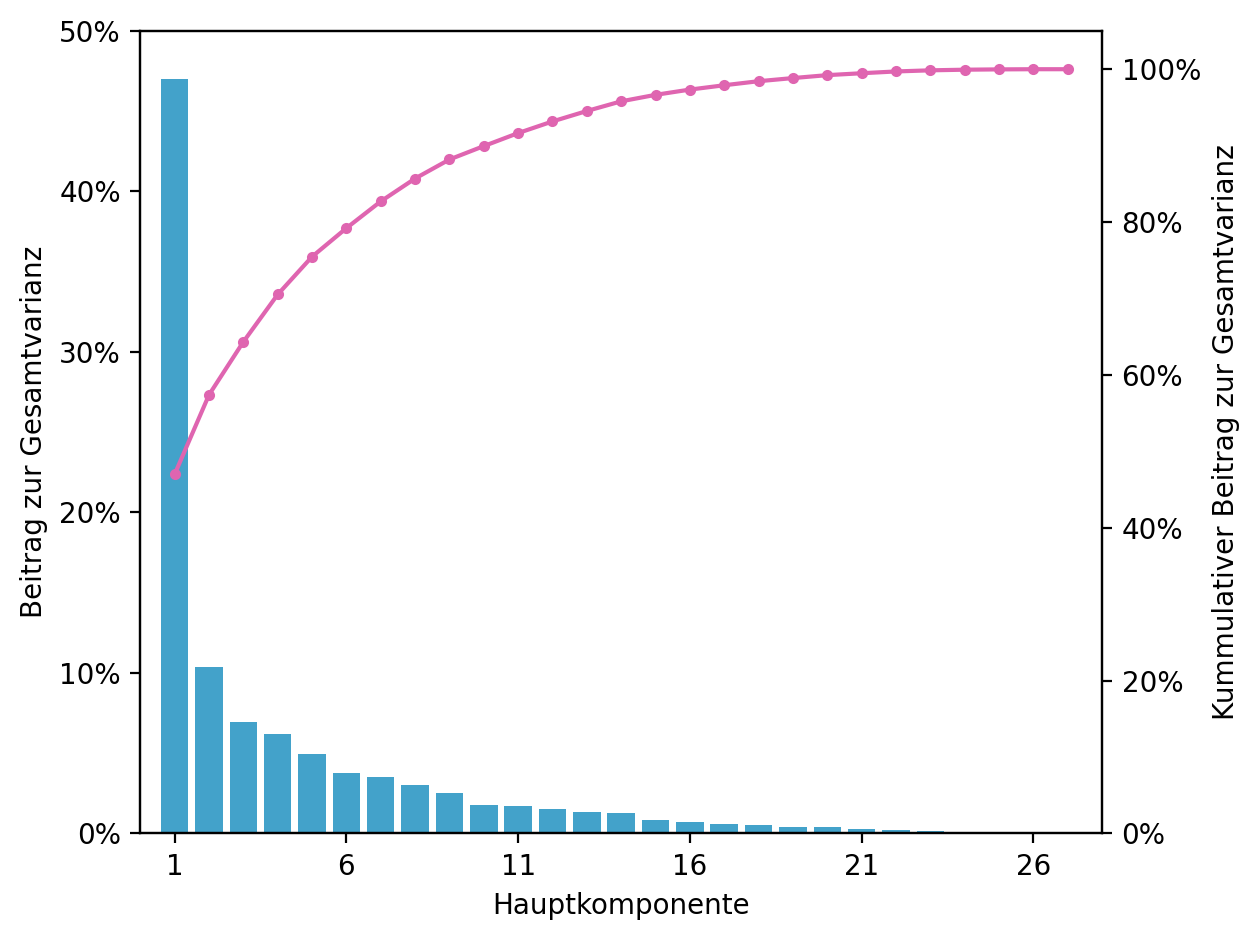

In [21]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ticks = np.arange(0, N_komp+1, 5)+1
ax.bar(np.arange(N_komp)+1, expl_var_ratio, color="#43a2ca")
ax.set(
    xlabel="Hauptkomponente", ylabel="Beitrag zur Gesamtvarianz",
    xlim=[0, N_komp+1], xticks=ticks, yticks=ax.get_yticks(),
)
ax.set_yticklabels(["{:.0f}%".format(100*t) for t in ax.get_yticks()])
axr = ax.twinx()
axr.plot(np.arange(N_komp)+1, expl_var_ratio.cumsum(), ".-", c="#df65b0")
axr.set(
    ylabel="Kummulativer Beitrag zur Gesamtvarianz",
    ylim=[0., 1.05], yticks=np.arange(0., 1.1, 0.2),
)
axr.set_yticklabels(["{:.0f}%".format(100*t) for t in axr.get_yticks()])
fig.set_layout_engine("tight")

### Reduzierte Darstellung

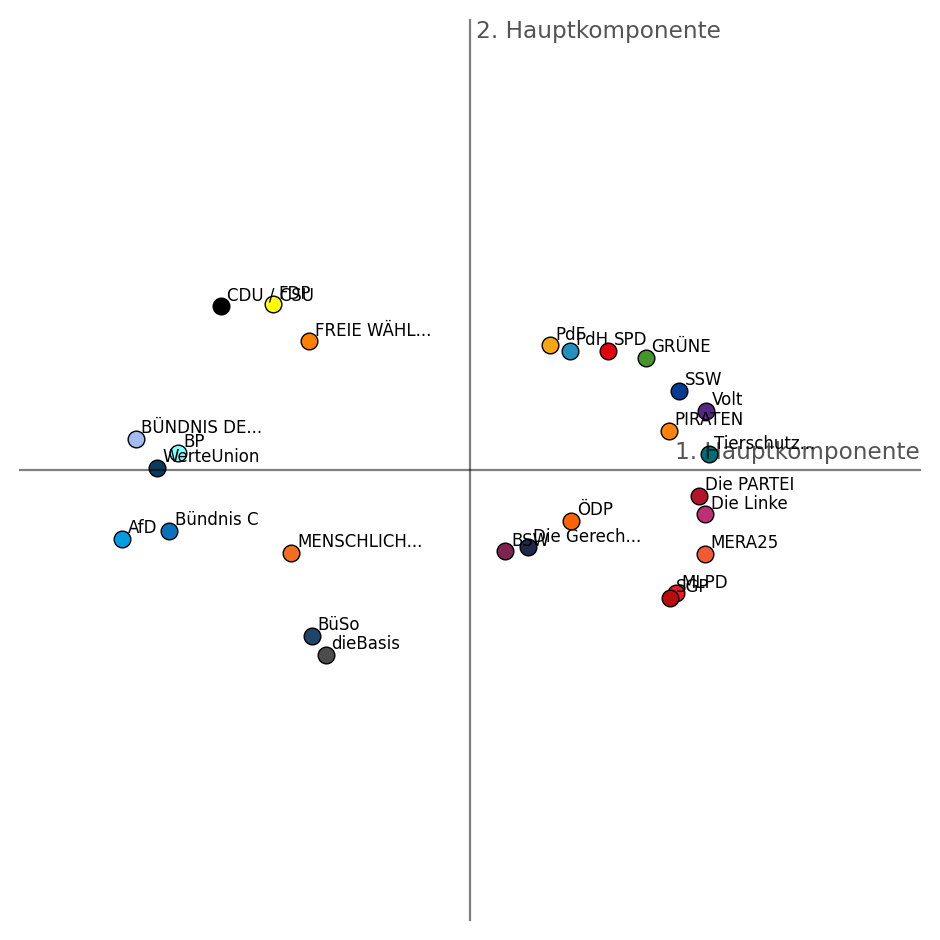

In [22]:
offset = 0.1
lim = np.ceil(np.abs(Y).max())+1
fig, ax = plt.subplots(figsize=(4.8, 4.8))
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True: # Parteinamen an-/ausschalten
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
ax.set(
    aspect=1., xlim=[-lim, lim], ylim=[-lim, lim], xticks=[], yticks=[], xticklabels=[], yticklabels=[],
)
if True: # Achsen an-/ausschalten
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
fig.set_layout_engine("tight")

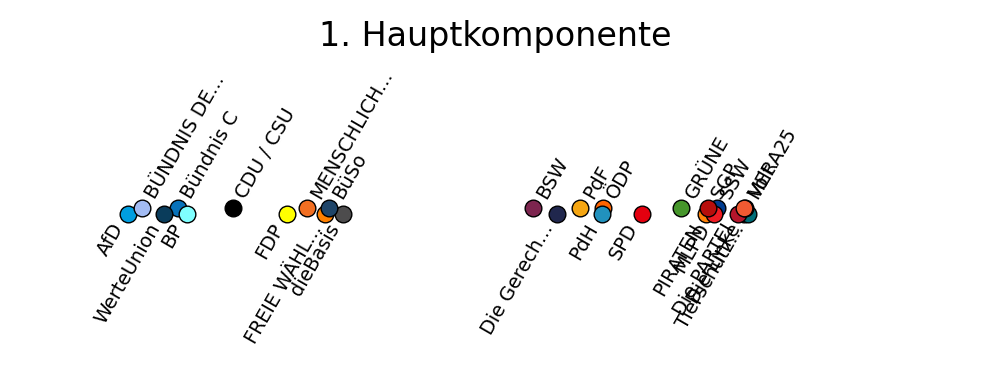

In [23]:
i_sorted = np.argsort(Y[:, 0])
lim = np.ceil(np.abs(Y).max())+1
fig, ax = plt.subplots(figsize=(6.4, 2.))
for i in range(N_par):
    up = (i==i_sorted).argmax()%2
    if up:
        ax.plot(Y[i, 0], 0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], 0.15, parties_short[i], rotation=60, ha="left", va="bottom", fontsize="x-small")
    else:
        ax.plot(Y[i, 0], -0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], -0.15, parties_short[i], rotation=60, ha="right", va="top", fontsize="x-small")
ax.set(
    aspect=1., title="1. Hauptkomponente", xlim=[-lim, lim], ylim=[-2.5, 2.5]
)
ax.axis("off")
fig.set_layout_engine("tight")

### Beiträge zu den Hauptkomponenten

In [24]:
komp_the = np.empty((N_komp, N_the))
i_sorted = np.empty((N_komp, N_the), dtype=int)
for i in range(N_komp):
    komp_the[i, :] = (1. - data.X.mean(0)) * pca.components_.T[:, i]
    i_sorted[i, :] = komp_the[i, :].argsort()
    komp_the[i, :] = komp_the[i, :][i_sorted[i, :]]

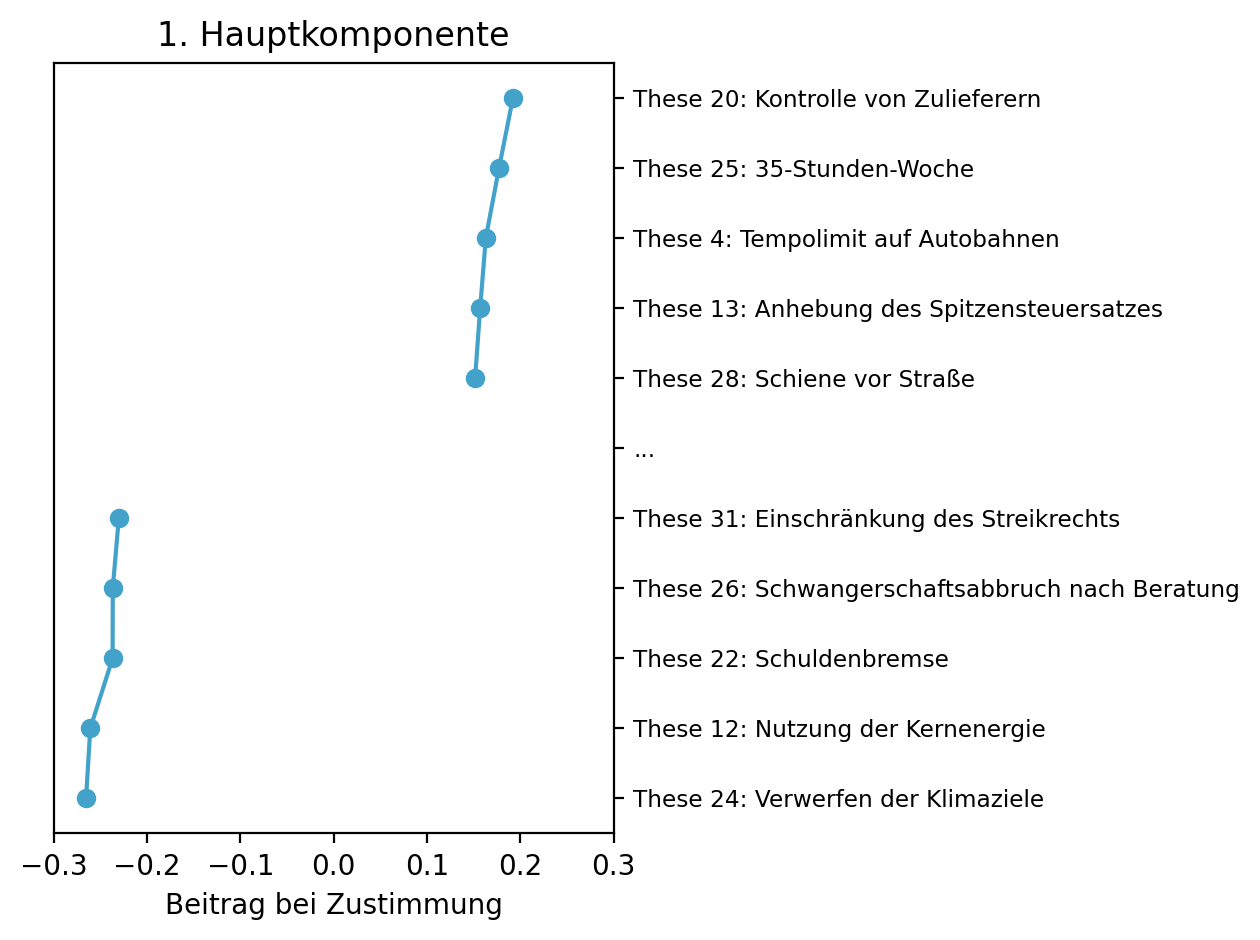

In [25]:
N_cut, N_pad = 5, 1
N_k = 1
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#43a2ca")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#43a2ca")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set(
    title="1. Hauptkomponente",
    yticks=np.arange(2*N_cut+N_pad),
    xlabel="Beitrag bei Zustimmung", xlim=[-lim, lim],
)
ax.set_yticklabels(ticklabels, fontsize="small")
fig.set_layout_engine("tight")

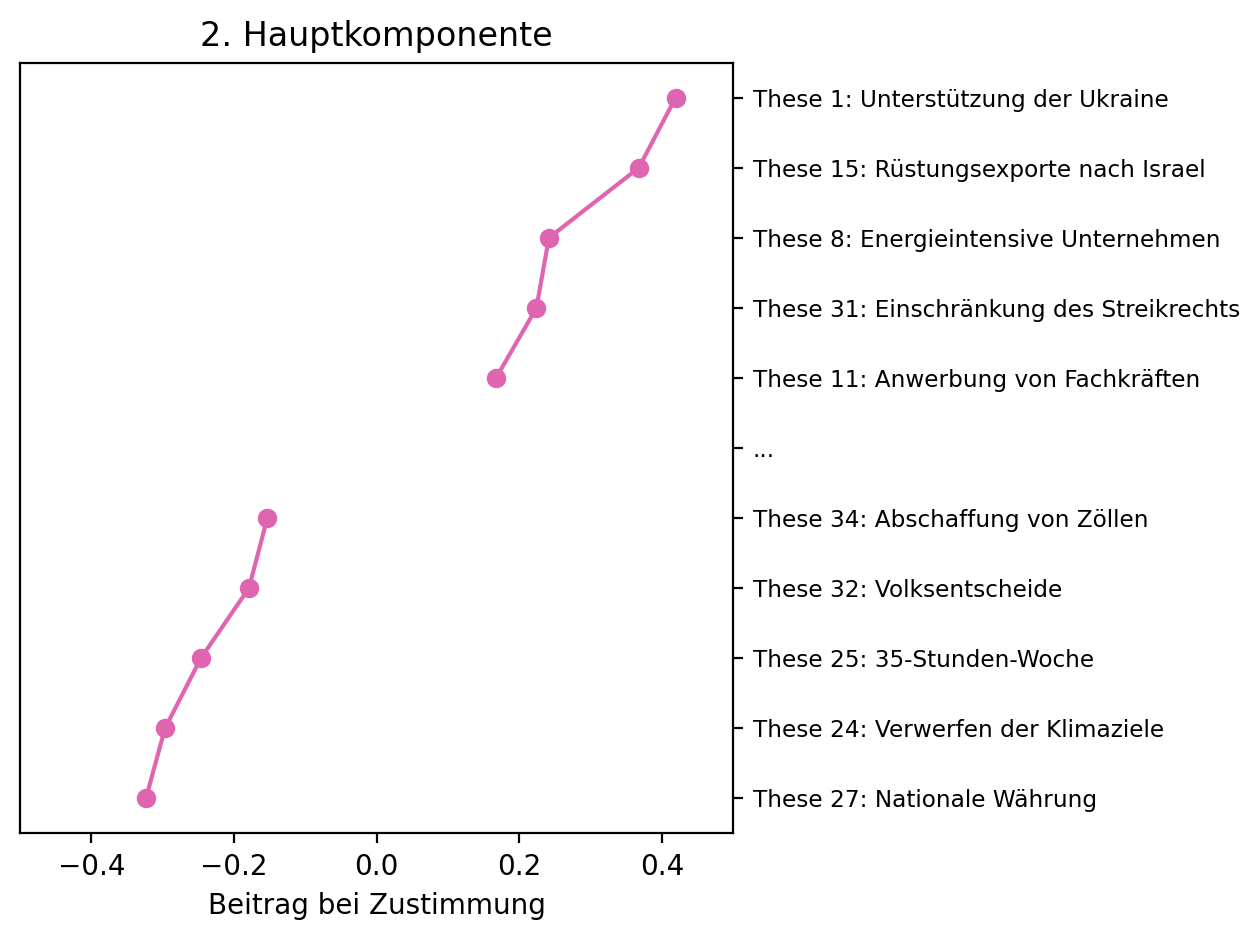

In [26]:
N_cut, N_pad = 5, 1
N_k = 2
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#df65b0")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#df65b0")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set(
    title="2. Hauptkomponente",
    yticks=np.arange(2*N_cut+N_pad),
    xlabel="Beitrag bei Zustimmung", xlim=[-lim, lim],
)
ax.set_yticklabels(ticklabels, fontsize="small")
fig.set_layout_engine("tight")

## Übereinstimmung der Parteien zueinander

In [27]:
norm = np.empty((N_par, N_par))
i_sorted = np.argsort(Y[:, 0])
for i, ii in enumerate(i_sorted):
    for j, jj in enumerate(i_sorted):
        if i==j:
            norm[i, i] = np.nan
            continue
        norm[i, j] = np.linalg.norm(data.X[ii, :]-data.X[jj, :])
        norm[j, i] = norm[i, j]
norm_max = 2.*N_the**0.5
norm = (norm_max-norm) / norm_max
norm_min = norm[np.where(~np.isnan(norm))].min()
norm_max = norm[np.where(~np.isnan(norm))].max()

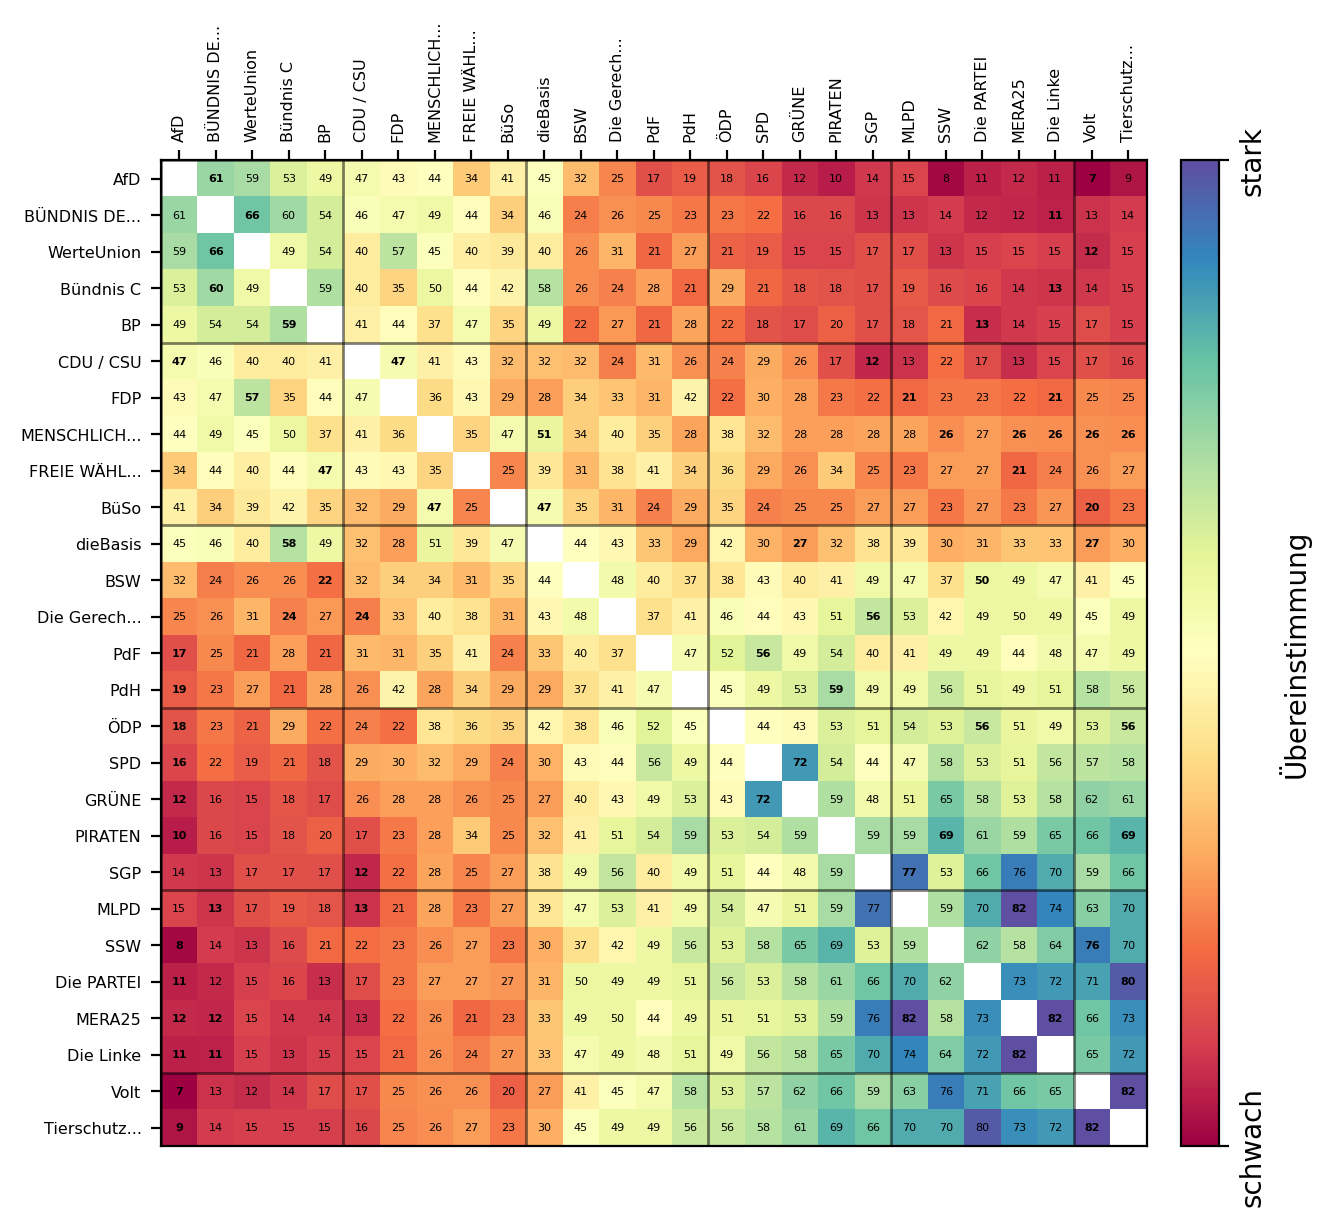

In [28]:
fig, ax = plt.subplots(figsize=(6.4, 6.4))
p = ax.matshow(norm, vmin=norm_min, vmax=norm_max, cmap="Spectral")
ax.set(
    aspect=1.,
    xticks=np.arange(N_par), yticks=np.arange(N_par),
)
ax.set_xticklabels(np.array(parties_short)[i_sorted], rotation=90, fontsize="xx-small")
ax.set_yticklabels(np.array(parties_short)[i_sorted], fontsize="xx-small")
ticks = np.arange(0, N_par, 5)
ax.xaxis.tick_top()
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
pos = ax.get_position()
cb_ax = fig.add_axes([1.03*pos.x1, pos.y0, 0.03, pos.y1-pos.y0])
cbar = plt.colorbar(p, ticks=[norm_min, norm_max], cax=cb_ax)
cbar.set_label("Übereinstimmung")
cbar.set_ticklabels(["schwach", "stark"], rotation=90, va="center")
if True: # Zahlen an-/ausschalten
    for i in range(N_par):
        for j in range(N_par):
            if j==i:
                continue
            nmax = np.round(norm[np.where(np.isfinite(norm[:, j])), j].max(), 2)
            nmin = np.round(norm[np.where(np.isfinite(norm[:, j])), j].min(), 2)
            if np.round(norm[i, j], 2)==nmin or np.round(norm[i, j], 2)==nmax:
                fontweight="bold"
            else:
                fontweight="normal"
            ax.text(i, j, "{:.0f}".format(norm[i, j]*100), fontsize=4, va="center", ha="center", fontweight=fontweight)

## Zusätzliche Partei hinzufügen

In [29]:
X_random = np.random.randint(-1, high=1, size=(1, N_the))
Y_random = pca.transform(X_random)

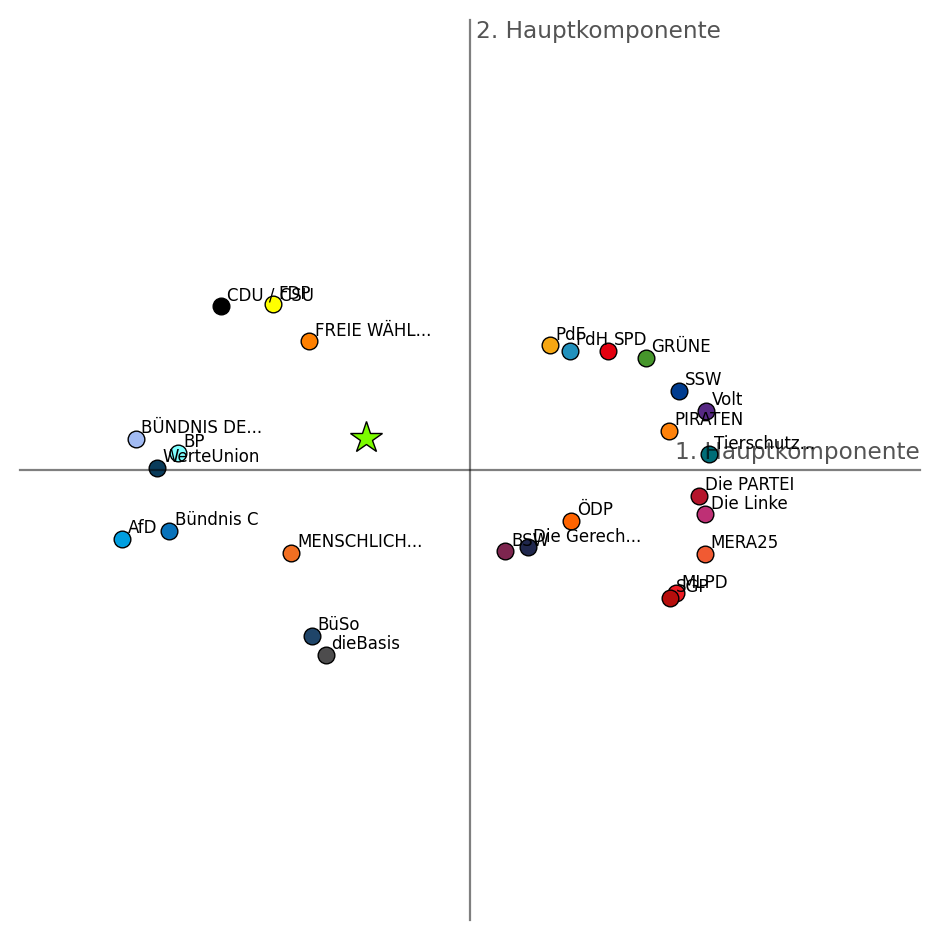

In [30]:
offset = 0.1
lim = np.ceil(np.abs(Y).max())+1
fig, ax = plt.subplots(figsize=(4.8, 4.8))
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True: # Parteinamen an-/ausschalten
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
ax.plot(Y_random[0, 0], Y_random[0, 1], "*", markersize=12, c="lawngreen", markeredgecolor="black", markeredgewidth=0.5)
ax.set(
    aspect=1., xlim=[-lim, lim], ylim=[-lim, lim], xticks=[], yticks=[], xticklabels=[], yticklabels=[],
)
if True: # Achsen an-/ausschalten
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
fig.set_layout_engine("tight")